In [1]:
from full_Goodfellow_preprocess import *

In [2]:
# read data
X = pd.read_csv("data/X_train.csv", nrows=10)
X = X.drop(columns=["id"])

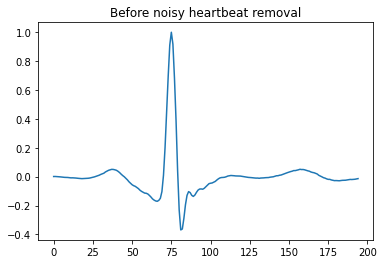

Removed heartbeats: 5


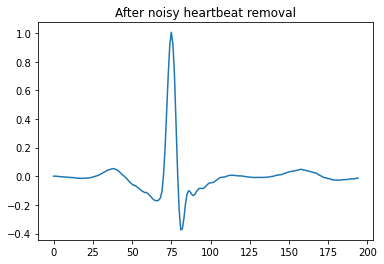

In [3]:
signal_raw = X.iloc[8].dropna().to_numpy(dtype='float32')

ecg_processed = ecg.ecg(signal_raw, 300, show=False)

# filter
signal = apply_filter(signal_raw)

# get r_peaks
r_peaks = ecg_processed['rpeaks']

# using extraction method of Goodfellow, they use 0.25 seconds before r_peak,
# as opposed to 0.2 before r_peak as in ecg.ecg
templates, r_peaks = extract_templates(signal, r_peaks)

# templates are of shape (number sample points, number beats), this is a bit
# confusing, but I left it as is to make adaption of the following functions
# easier

# multiply inverted signals by -1
signal, templates, signal_raw = invert(signal, templates, signal_raw)

# normalize
signal, templates, signal_raw = normalize(signal, templates, signal_raw)

# steps above are done for all features

# correct some shifted r_peaks -> this is done for template and hrv statistics
templates, r_peaks = r_peak_check(signal, templates, r_peaks)

###

# this part is for visualization purpose of what the r_peak filter does

median = np.median(templates, axis=1)

plt.plot(range(median.shape[0]), median)
plt.title("Before noisy heartbeat removal")

plt.show()

before = r_peaks.shape[0]

###

# filter noisy heartbeats based on correlation with median heartbeat
# -> this is only done for template statistics

templates, r_peaks = filter_rpeaks(templates, r_peaks)

###

# this part is for visualization purpose of what the r_peak filter does

print("Removed heartbeats:", before - r_peaks.shape[0])
plt.title("After noisy heartbeat removal")

median = np.median(templates, axis=1)

plt.plot(range(median.shape[0]), median)

plt.show()

###